# Example of permutation tests

First we pick two samples $A$ and $B$, from normal distributions with slightly different means

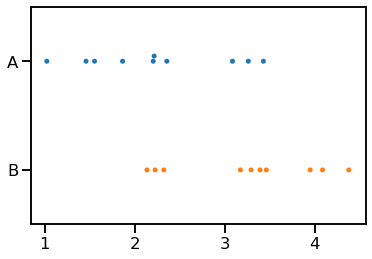

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context("talk")

num_individs = 10
mu, sigma = 2, 1 # mean and standard deviation

sample_A = np.random.normal(mu, sigma, num_individs)
sample_B = np.random.normal(mu+1.0, sigma, num_individs)

sns.swarmplot(x=np.concatenate((sample_A,sample_B), axis=0), 
              y=["A"]*num_individs + ["B"]*num_individs)



Under the null hypothesis that the values are stemming from the same distribution we should be able to pool our values into one combined $A+B$ sample, and see how many ways there are to pick two samples from A+B that have a difference in means ≥ the one obseved between $A$ and $B$. This equals to the number of ways to pick a sample from $A+B$ with a mean ≥ the mean of $B$

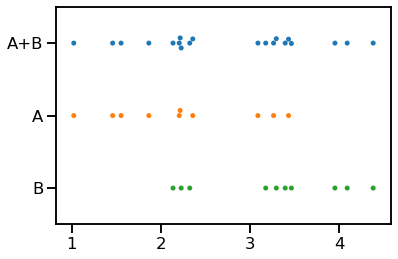

In [2]:
sample_AB = np.concatenate((sample_A,sample_B), axis=0)

sns.swarmplot(x=np.concatenate((sample_AB,sample_A,sample_B), axis=0), 
              y=["A+B"]*(num_individs*2) + ["A"]*num_individs + ["B"]*num_individs)

In [3]:
mean_B = np.mean(sample_B)
print("The mean of sample B is {}".format(mean_B))


The mean of sample B is 3.2426825320785744


[Text(0, 0.5, 'Number of permutations'), Text(0.5, 0, 'Mean of permutation')]

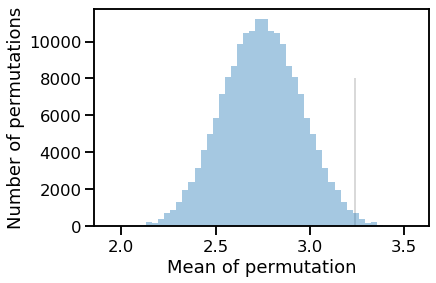

In [4]:
import itertools
sample_means = []
for comb in itertools.combinations(sample_AB,num_individs):
    sample_means.append(np.mean(comb))
ax = sns.distplot(sample_means, kde=False)
sns.lineplot(x=[mean_B,mean_B],y=[0,8000],color="k")
ax.set(ylabel='Number of permutations', xlabel='Mean of permutation')



In [5]:
num_comb = len(sample_means)
print("The number of ways to select {} individuals out of {} is {}".format(num_individs,num_individs*2,len(sample_means)) )
num_extreme = len([s for s in sample_means if s >= mean_B])
print("The number of more extreme samples than B when sampling from A+B {}".format(num_extreme))
p = num_extreme/float(num_comb)
print("The one sided p-value is {}".format(p))

The number of ways to select 10 individuals out of 20 is 184756
The number of more extreme samples than B when sampling from A+B 1294
The one sided p-value is 0.007003832081231462
